In [1]:
# correlation of SCI and human capital index
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

sci_data = pd.read_csv('data/sci.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
print(sci_data)

      user_loc fr_loc  scaled_sci  Migrants_from_fr
0           AE     AE     1318515               NaN
1           AE     AG        7764               NaN
2           AE     AL        2836               NaN
3           AE     AM        4174               NaN
4           AE     AO        2954               NaN
...        ...    ...         ...               ...
34220       NA     YT       12385               NaN
34221       NA     ZA       88866            7872.0
34222       NA     ZM      137582            2806.0
34223       NA     ZW      326749           13413.0
34224       NA     NA   115262823               NaN

[34225 rows x 4 columns]


In [2]:
# correlation between human capital index and SCI
country_data = pd.read_csv('data/country.csv',encoding='latin-1')
print(country_data)

hci = country_data[['alpha-2','Human Capital Index (2018)']]

# merge human capital index and SCI datasets
merged = sci_data.merge(hci,
                            how='left',
                            left_on='user_loc',
                            right_on = 'alpha-2')
merged = merged.merge(hci,
                        how='left',
                        left_on='fr_loc',
                        right_on='alpha-2',
                        suffixes=('_user','_fr'))
merged = merged.drop(columns=['alpha-2_user','alpha-2_fr'])
print(merged)

                      Country alpha-2 Alpha-3 code  Numeric          gdp  \
0                 Afghanistan      AF          AFG        4  524.1628809   
1                     Albania      AL          ALB        8  5284.380184   
2                     Algeria      DZ          DZA       12  4114.715061   
3              American Samoa      AS          ASM       16  11466.69071   
4                     Andorra      AD          AND       20  41793.05526   
..                        ...     ...          ...      ...          ...   
211  Virgin Islands (British)      VG          VGB       92           ..   
212     Virgin Islands (U.S.)      VI          VIR      850           ..   
213                     Yemen      YE          YEM      887  968.1590476   
214                    Zambia      ZM          ZMB      894  1556.334482   
215                  Zimbabwe      ZW          ZWE      716  1683.740577   

    Population (2019) Literacy Rate Age 15+ (2018) Internet Rate (2017)  \
0           

In [3]:
# cleaning data to remove NA values from hci
merged['hci_user'] = pd.to_numeric(merged['Human Capital Index (2018)_user'], errors='coerce')
merged['hci_fr'] = pd.to_numeric(merged['Human Capital Index (2018)_fr'], errors='coerce')
merged = merged[merged['hci_user'].notna()]
merged = merged[merged['hci_fr'].notna()]
print(merged)

      user_loc fr_loc  scaled_sci  Migrants_from_fr  \
0           AE     AE     1318515               NaN   
1           AE     AG        7764               NaN   
2           AE     AL        2836               NaN   
3           AE     AM        4174               NaN   
4           AE     AO        2954               NaN   
...        ...    ...         ...               ...   
34032       ZW     VU        1242               NaN   
34033       ZW     WS        1549               NaN   
34036       ZW     ZA      405329           18610.0   
34037       ZW     ZM      180066           30662.0   
34038       ZW     ZW    23660571               NaN   

      Human Capital Index (2018)_user Human Capital Index (2018)_fr  hci_user  \
0                         0.676001251                   0.676001251  0.676001   
1                         0.676001251                    0.57821697  0.676001   
2                         0.676001251                   0.628666282  0.676001   
3              

In [4]:
merged.describe()

,scaled_sci,Migrants_from_fr,hci_user,hci_fr
count,2.250000e+04,7.191000e+03,22500.000000,22500.000000
mean,5.193685e+05,2.392768e+04,0.572248,0.572248
std,1.638983e+07,1.924712e+05,0.146534,0.146534
min,6.200000e+01,1.000000e+00,0.299029,0.299029
25%,6.280000e+02,8.300000e+01,0.444788,0.444788
50%,1.565000e+03,5.680000e+02,0.574973,0.574973
75%,5.876000e+03,4.461000e+03,0.694806,0.694806
max,1.000000e+09,1.268307e+07,0.887084,0.887084


In [5]:
# add a column for absolute difference
merged["abs_diff_hci"] = abs(merged['hci_user'] - merged['hci_fr'])

# drop any rows if the absolute difference is 0; this is when a country was compared against itself
merged.drop(merged[merged["abs_diff_hci"] == 0].index, inplace = True) 
print(merged)

      user_loc fr_loc  scaled_sci  Migrants_from_fr  \
1           AE     AG        7764               NaN   
2           AE     AL        2836               NaN   
3           AE     AM        4174               NaN   
4           AE     AO        2954               NaN   
5           AE     AR         887               NaN   
...        ...    ...         ...               ...   
34031       ZW     VN         116               NaN   
34032       ZW     VU        1242               NaN   
34033       ZW     WS        1549               NaN   
34036       ZW     ZA      405329           18610.0   
34037       ZW     ZM      180066           30662.0   

      Human Capital Index (2018)_user Human Capital Index (2018)_fr  hci_user  \
1                         0.676001251                    0.57821697  0.676001   
2                         0.676001251                   0.628666282  0.676001   
3                         0.676001251                   0.581725955  0.676001   
4              

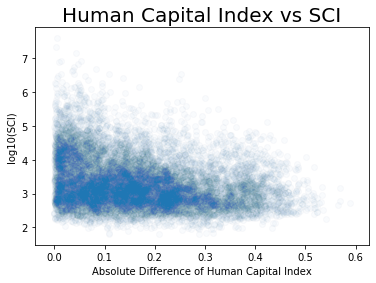

In [6]:
import math
merged['scaled_sci'] = pd.to_numeric(sci_data['scaled_sci'], errors='coerce')
merged['SCI_log10'] = np.log10(sci_data['scaled_sci'])

plt.scatter(merged['abs_diff_hci'], merged['SCI_log10'], alpha = 0.01)
plt.xlabel('Absolute Difference of Human Capital Index')
plt.ylabel('log10(SCI)')
plt.title('Human Capital Index vs SCI', fontsize=20)
plt.show()

In [7]:
#using ranksums to perform Wilcoxon Rank Sum Test on two samples
from scipy.stats import ranksums
ranksums(merged["scaled_sci"], merged["abs_diff_hci"])

RanksumsResult(statistic=183.09628619056735, pvalue=0.0)

In [8]:
#using spearmanr to get the spearman coeffecient of the two samples
from scipy.stats import spearmanr
sp_coef = spearmanr(merged["scaled_sci"], merged["abs_diff_hci"])
print(sp_coef)

SpearmanrResult(correlation=-0.26856444236110766, pvalue=0.0)
